In [1]:
import nn
from graphviz import Digraph

def visualize_neural_network(neurons):
    dot = Digraph(comment='Neural Network')
    dot.attr(rankdir='LR')
    
    for neuron in neurons:
        dot.node(f'Neuron_{neuron.id}', label=f'{neuron.id} | Bias: {neuron.bias:.2f} \n val: {neuron.value}', shape = 'ellipse', height = '0.5', width = '1', fontsize = '10')

        for synapse in neuron.out_synapses:
            dot.node(f'Synapse_{synapse.id}', label=f'Synapse {synapse.id}\nWeight: {synapse.weight:.2f}', shape = 'rarrow', fontsize = '10')
            dot.edge(f'Neuron_{neuron.id}', f'Synapse_{synapse.id}')
            dot.edge(f'Synapse_{synapse.id}', f'Neuron_{synapse.into.id}')

    return dot

In [2]:
a = nn.Neuron(1, 0.5)
b = nn.Neuron(2, 1.5)
c = nn.Neuron(3, 2)

l = nn.Layer([a, b])

In [3]:
a.value = 5
b.value = 10

In [4]:
print(a)
print(b)
print(c)

[Neuron 1] Bias: 0.5
[Neuron 2] Bias: 1.5
[Neuron 3] Bias: 2


In [5]:
# id: int, out_id: int, in_id: int, weight: float, is_on: bool
d = nn.Synapse(1, a, c, 0.5, True)
e = nn.Synapse(2, b, c, 0.5, True)
d

[Synapse 1] Neuron 1 -> Neuron 3, Weight: 0.5, Enabled

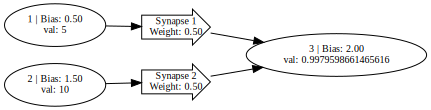

In [8]:
visualize_neural_network([a, b, c])

In [7]:
l.forward()